# Desafio Sprint 2
### Instalando as dependências

In [12]:
!conda install --yes pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



### Removendo linhas duplicadas

In [13]:
dataframe = pd.read_csv("googleplaystore.csv")

dataframe.drop_duplicates()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Criando o gráfico com o top 5 apps mais baixados

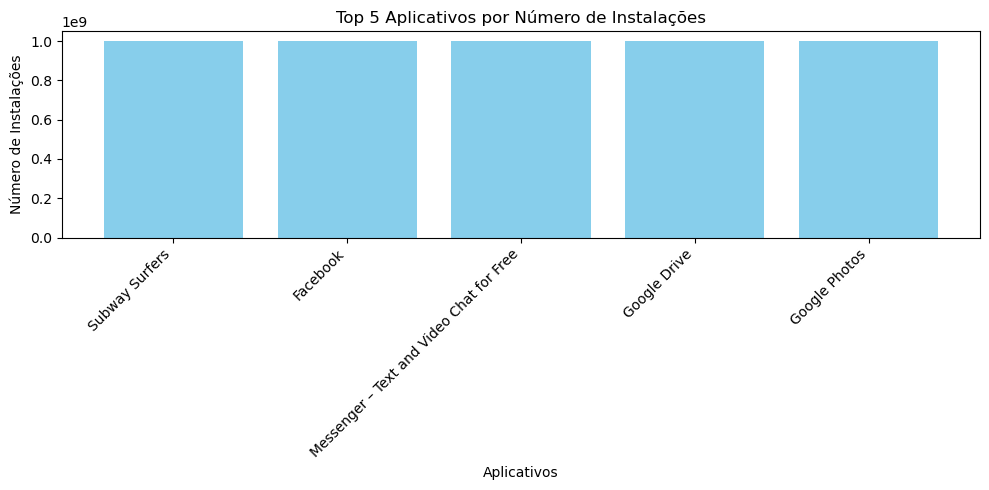

In [14]:
dataframe["Installs"] = dataframe["Installs"].str.replace("+", "", regex=False)
dataframe["Installs"] = dataframe["Installs"].str.replace(",", "", regex=False)
dataframe["Installs"] = pd.to_numeric(dataframe["Installs"], errors="coerce")

dataframe_sorted = dataframe.sort_values(by="Installs",ascending=False)

top_5_apps = dataframe_sorted.head(6)


plt.figure(figsize=(10,5))
plt.bar(top_5_apps["App"], top_5_apps["Installs"], color="skyblue")
plt.xlabel('Aplicativos')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Aplicativos por Número de Instalações')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

### Criando um gráfico de pizza para mostrar as categorias existentes

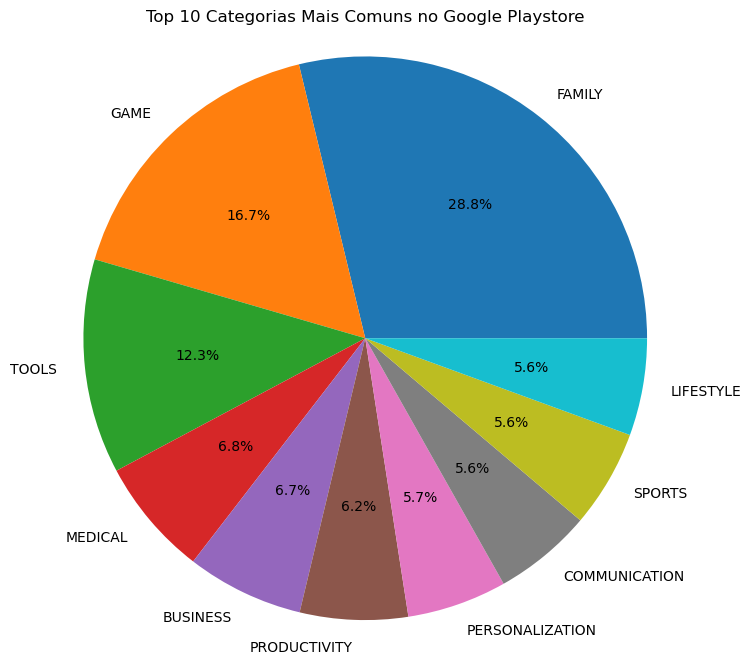

In [15]:
category_count = dataframe["Category"].value_counts()

top_category = category_count.head(10)


plt.figure(figsize=(8, 8))
plt.pie(top_category, labels=top_category.index, autopct='%1.1f%%')
plt.title(f"Top 10 Categorias Mais Comuns no Google Playstore")
plt.axis("equal")
plt.show()

### Mostrando o app mais caro no dataset

In [16]:
dataframe["Price"] = dataframe["Price"].str.replace("$", "", regex=False)
dataframe["Price"] = pd.to_numeric(dataframe["Price"], errors="coerce")

most_expensive_app = dataframe.loc[dataframe["Price"].idxmax()]

print("O app mais caro é ")
print(most_expensive_app[["App", "Category", "Price"]])

O app mais caro é 
App         I'm Rich - Trump Edition
Category                   LIFESTYLE
Price                          400.0
Name: 4367, dtype: object


### Apps que são classificados como "Mature 17+"

In [17]:
mature_apps = dataframe[dataframe["Content Rating"] == "Mature 17+"].shape[0]

print(f"Total de aplicativos com Content Rating 'Mature 17+': {mature_apps}")

Total de aplicativos com Content Rating 'Mature 17+': 499


### Mostrando o top 10 apps por número de review

In [18]:
dataframe["Reviews"] = pd.to_numeric(dataframe["Reviews"], errors="coerce")
top_10_per_review = dataframe.sort_values("Reviews", ascending=False)[:10]
print("Top 10 apps por número de reviews: ")
print(top_10_per_review[["App", "Category", "Reviews"]])

Top 10 apps por número de reviews: 
                                           App       Category     Reviews
2544                                  Facebook         SOCIAL  78158306.0
3943                                  Facebook         SOCIAL  78128208.0
381                         WhatsApp Messenger  COMMUNICATION  69119316.0
336                         WhatsApp Messenger  COMMUNICATION  69119316.0
3904                        WhatsApp Messenger  COMMUNICATION  69109672.0
2604                                 Instagram         SOCIAL  66577446.0
2611                                 Instagram         SOCIAL  66577313.0
2545                                 Instagram         SOCIAL  66577313.0
3909                                 Instagram         SOCIAL  66509917.0
382   Messenger – Text and Video Chat for Free  COMMUNICATION  56646578.0


### Criando duas operações para uso posterior

In [19]:
dataframe = dataframe.dropna(subset=['Type'])
type_counts = dataframe['Type'].value_counts()

category_type_counts = dataframe.groupby(['Category', 'Type']).size().unstack(fill_value=0)
category_count = category_count.fillna(0)

### Graficos para as operações anteriores

<Figure size 1400x800 with 0 Axes>

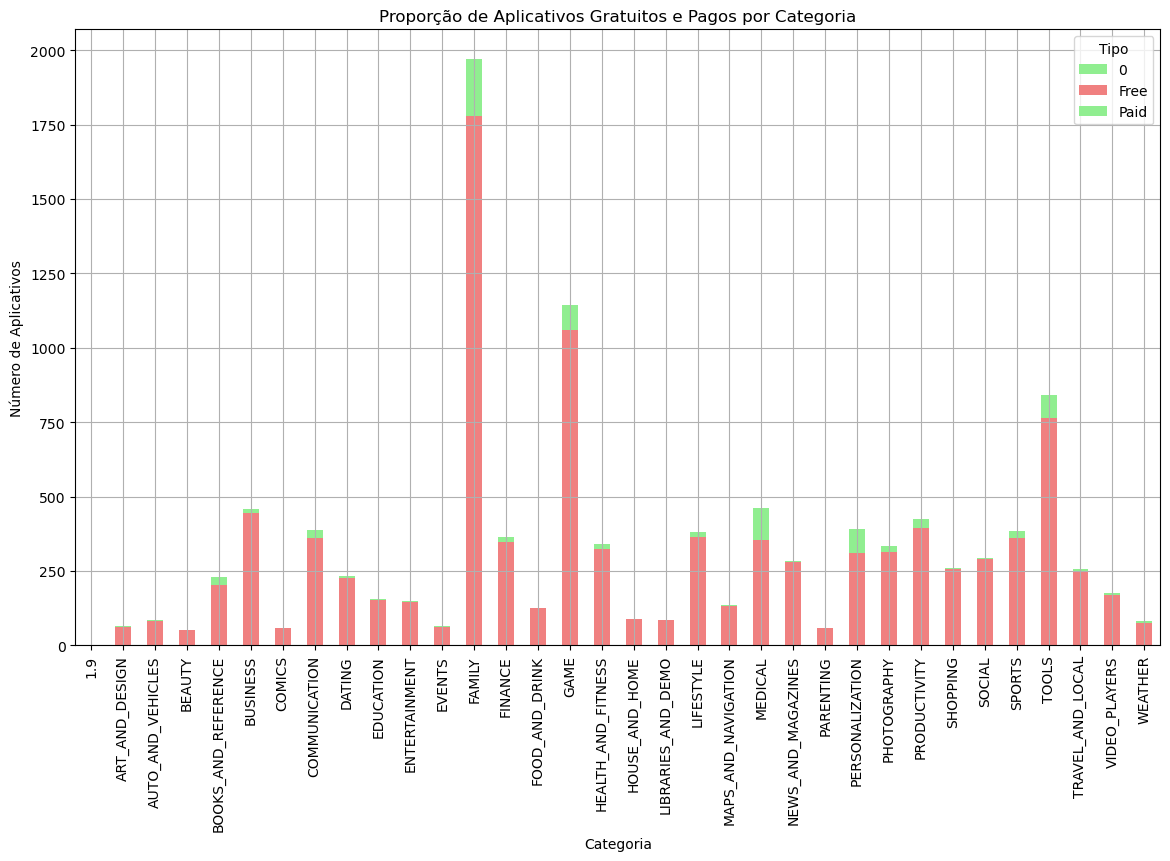

In [20]:
plt.figure(figsize=(14, 8))
category_type_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], figsize=(14, 8))
plt.title('Proporção de Aplicativos Gratuitos e Pagos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Aplicativos')
plt.xticks(rotation=90)
plt.legend(title='Tipo')
plt.grid(True)
plt.show()

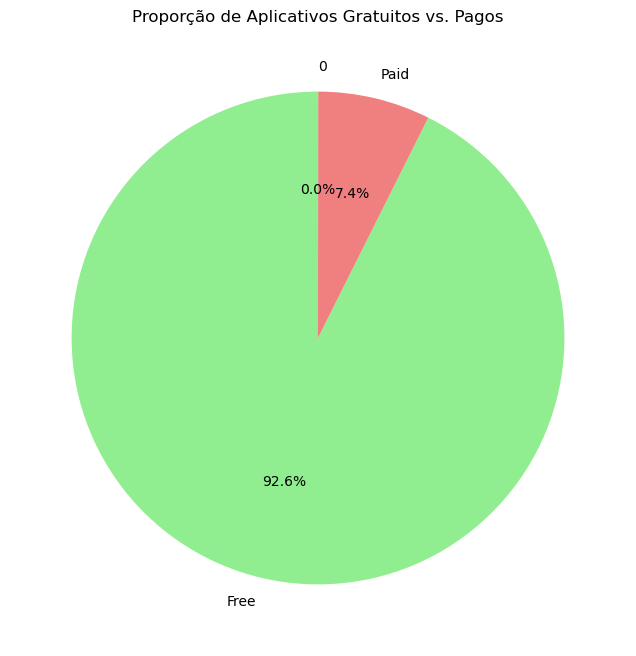

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Proporção de Aplicativos Gratuitos vs. Pagos')
plt.show()